In [1]:
from bggcohomology.bggcomplex import BGGComplex
from bggcohomology.la_modules import LieAlgebraCompositeModule, ModuleFactory, BGGCohomology
import numpy as np

In this notebook we use our algorithm to confirm results stated in [The null-cone and cohomology of vector bundles on flag manifolds](https://arxiv.org/abs/1505.07619) by Vilonen and Xue. This provides an excellent way to test the implementation.

_____
$H^k(X,\mathfrak b)=0$ for all $k$ and for all types.

In [2]:
for d in ['A1','A2','A3','A4','A5','B2','B3','B4','C3','C4','D4','G2']:
    BGG = BGGComplex(d)
    factory = ModuleFactory(BGG.LA)
    component_dic = {'b':factory.build_component('b','coad')}
    
    components = [[("b",1,'wedge')]]
    module = LieAlgebraCompositeModule(factory,components,component_dic)

    cohom = BGGCohomology(BGG, module)
    cohom.cohomology_LaTeX(complex_string=str(d)+r',\mathfrak b')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

____
For type $A_n$ with $n\geq 2$ we should have,
$$H^k(X,\mathfrak b\otimes \mathfrak b) = \left\{\begin{array}{lr}
0 & \text{if } k\neq 1\\
\mathbb C & \text{if } k=1
\end{array}\right.$$

In [3]:
for d in ['A2','A3','A4','A5']:
    BGG = BGGComplex(d)
    factory = ModuleFactory(BGG.LA)
    component_dic = {'b':factory.build_component('b','coad')}
    
    components = [[("b",1,'wedge')]*2]
    module = LieAlgebraCompositeModule(factory,components,component_dic)

    cohom = BGGCohomology(BGG, module)
    cohom.cohomology_LaTeX(complex_string=str(d)+r',\mathfrak b\otimes\mathfrak b')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

____
For type $A_n$ with $n\geq 2$ we should have,
$$H^k(X,\mathfrak b\otimes \mathfrak u) = \left\{\begin{array}{lr}
\mathbb C & \text{if } k=0\\
0 & \text{if } k\geq 1
\end{array}\right.$$

In [4]:
for d in ['A2','A3','A4','A5']:
    BGG = BGGComplex(d)
    factory = ModuleFactory(BGG.LA)
    component_dic = {'b':factory.build_component('b','coad'),
                    'u':factory.build_component('u','coad')}
    
    components = [[("b",1,'wedge'),("u",1,'wedge')]]
    module = LieAlgebraCompositeModule(factory,components,component_dic)

    cohom = BGGCohomology(BGG, module)
    cohom.cohomology_LaTeX(complex_string=str(d)+r',\mathfrak b\otimes\mathfrak b')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

___
For type $A_n$ with $n\geq 2$, we have

$H^k(X,\mathfrak b^{\otimes 3})=0$, $ k\neq 2,3$

Then for $A_2$ specifically

$H^2(A_2,\mathfrak b^{\otimes 3}) =\mathbb{C}^{2}\oplus L\left(\alpha_{1}+\alpha_{2}\right)^{5}\oplus L\left( 2\alpha_{1}+\alpha_{2}\right)\oplus L\left(\alpha_{1}+ 2\alpha_{2}\right)$

And $A_3$,

$H^3(A_3,\mathfrak b^{\otimes 3}) =L(\alpha_1+\alpha_2+\alpha_3)$

For $n\geq 3$ we have

$H^2(A_n,\mathfrak b^{\otimes 3}) =\mathbb{C}^{2}$

$H^3(A_n,\mathfrak b^{\otimes 3}) =0$

In [5]:
for d in ['A2','A3','A4','A5']:
    BGG = BGGComplex(d)
    factory = ModuleFactory(BGG.LA)
    component_dic = {'b':factory.build_component('b','coad')}
    
    components = [[("b",1,'wedge')]*3]
    module = LieAlgebraCompositeModule(factory,components,component_dic)

    cohom = BGGCohomology(BGG, module)
    cohom.cohomology_LaTeX(complex_string=str(d)+r',\mathfrak b^{\otimes 3}')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

For $A_5$ we should get
$$H^k(X,\mathfrak b^{\otimes 4}) = \left\{\begin{array}{lr}
L(\alpha_1+2\alpha_2+3\alpha_3+2\alpha_4+\alpha_5) & \text{if } k=5\\
0 & \text{if } k\neq 2,3,5
\end{array}\right.$$

In [2]:
%%prun -D prun.log
for d in ['A5']:
    BGG = BGGComplex(d)
    factory = ModuleFactory(BGG.LA)
    component_dic = {'b':factory.build_component('b','coad')}
    
    components = [[("b",1,'wedge')]*4]
    module = LieAlgebraCompositeModule(factory,components,component_dic)

    cohom = BGGCohomology(BGG, module)
    cohom.cohomology_LaTeX(complex_string=str(d)+r',\mathfrak b^{\otimes 4}')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

 
*** Profile stats marshalled to file 'prun.log'.


         43051994 function calls (42507057 primitive calls) in 42.649 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       16    8.702    0.544   10.156    0.635 {bggcohomology.cohomology.compute_diff}
    44340    2.349    0.000    3.743    0.000 {method 'solve_right' of 'sage.matrix.matrix2.Matrix' objects}
  1415881    1.833    0.000    4.637    0.000 root_lattice_realizations.py:235(_name_string_helper)
    61880    1.652    0.000    2.814    0.000 weyl_group.py:810(action)
    70738    1.271    0.000    4.117    0.000 finite_enumerated_set.py:145(__contains__)
    70926    1.149    0.000    3.841    0.000 {method 'index' of 'tuple' objects}
  1415881    1.136    0.000    1.690    0.000 root_system.py:367(_repr_)
   198784    1.044    0.000    1.140    0.000 matrix_space.py:819(_element_constructor_)
     2220    0.820    0.000    1.658    0.001 compute_maps.py:215(_multidegree_to_root_sum)
  1415892    0.789    0.000

For $B_2$ we expect $\mathrm H^{1}(B_2,\mathfrak b^{\otimes 2})=\mathbb{C}$, $\mathrm H^{2}(B_2,\mathfrak b^{\otimes 2})=L\left(\alpha_{1}+\alpha_{2}\right)$, and $0$ else.

In [ ]:
for d in ['B2']:
    BGG = BGGComplex(d)
    factory = ModuleFactory(BGG.LA)
    component_dic = {'b':factory.build_component('b','coad')}
    
    components = [[("b",1,'wedge')]*2]
    module = LieAlgebraCompositeModule(factory,components,component_dic)

    cohom = BGGCohomology(BGG, module)
    cohom.cohomology_LaTeX(complex_string=str(d)+r',\mathfrak b^{\otimes 2}')

In [3]:
import pstats
import io

result = io.StringIO()
stats = pstats.Stats('prun.log',stream=result)
stats.sort_stats("cumulative").print_stats()
result=result.getvalue()
# chop the string into a csv-like buffer
result='ncalls'+result.split('ncalls')[-1]
result='\n'.join([','.join(line.rstrip().split(None,5)) for line in result.split('\n')])
# save it to disk
 
with open('test.csv', 'w+') as f:
    #f=open(result.rsplit('.')[0]+'.csv','w')
    f.write(result)
    f.close()

In [32]:
import pickle
import numpy as np
mats_profile = pickle.load(open('profiling.pkl','rb'))
order = np.argsort([d["time_taken"] for d in mats_profile])
mat = mats_profile[order[-1]]['matrix']
mats_profile[order[-1]]

{'time': '2022-07-11 13:23:45.847338',
 'matrix': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 'start_time': 1372745.32633208,
 'shape': (4788, 4680),
 'rank': 2802,
 'time_taken': 39.62962111295201}

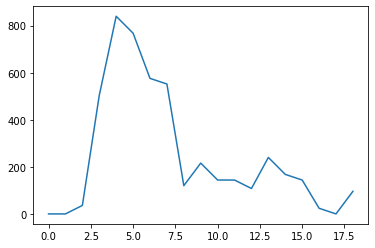

In [28]:
import matplotlib.pyplot as plt
x,y = mat.nonzero()
plt.plot(np.bincount((mat!=0).sum(axis=0)))

In [31]:
mat_dense = Matrix(mat)

In [35]:
mat_sparse = Matrix(mat, sparse=True)

In [36]:
mat_sparse.rank()

2802

In [41]:
Matrix(mat_dense, sparse=True).rank()

2802